<a href="https://colab.research.google.com/github/subramanian72/Singapore-Flat-Price-Prediction/blob/main/SingProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
# data1516 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
# data17 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
data.shape

(52203, 10)

In [4]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [5]:
data['month'].unique()

array(['2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02',
       '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
       '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12'], dtype=object)

In [6]:
#Extract the year
data['year'] = pd.DatetimeIndex(data['month']).year

In [7]:
data.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012
5,2012-03,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0,2012
6,2012-03,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0,2012
7,2012-03,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0,2012
8,2012-03,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,328000.0,2012
9,2012-03,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1985,330000.0,2012


In [8]:
data.shape

(52203, 11)

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 2
Float variables: 2


In [10]:
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

In [ ]:
data['resale_price']

0         255000.0
1         275000.0
2         285000.0
3         290000.0
4         290000.0
            ...   
205205    788888.0
205206    838000.0
205207    755000.0
205208    780000.0
205209    785000.0
Name: resale_price, Length: 205210, dtype: float64

Data **Cleaning**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
 10  year                 52203 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.4+ MB


In [12]:
new_dataset = data.dropna()

In [13]:
new_dataset.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

In [14]:
new_dataset.shape

(52203, 11)

In [15]:
new_dataset['flat_model'].value_counts()

Model A                14430
Improved               13744
New Generation          9598
Premium Apartment       4514
Simplified              3092
Apartment               2150
Standard                2144
Maisonette              1443
Model A2                 792
Adjoined flat             84
Model A-Maisonette        75
DBSS                      72
Terrace                   33
Multi Generation          21
Improved-Maisonette        6
Premium Maisonette         4
Type S1                    1
Name: flat_model, dtype: int64

In [16]:
new_dataset['flat_model'].unique()

array(['Improved', 'New Generation', 'Standard', 'Model A', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Model A-Maisonette',
       'Apartment', 'Adjoined flat', 'Multi Generation', 'Model A2',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', 'DBSS',
       'Type S1'], dtype=object)

In [17]:
new_dataset['floor_area_sqm'].value_counts()

67.0     3531
110.0    2825
104.0    2415
90.0     1994
68.0     1992
         ... 
266.0       1
188.0       1
39.0        1
249.0       1
199.0       1
Name: floor_area_sqm, Length: 163, dtype: int64

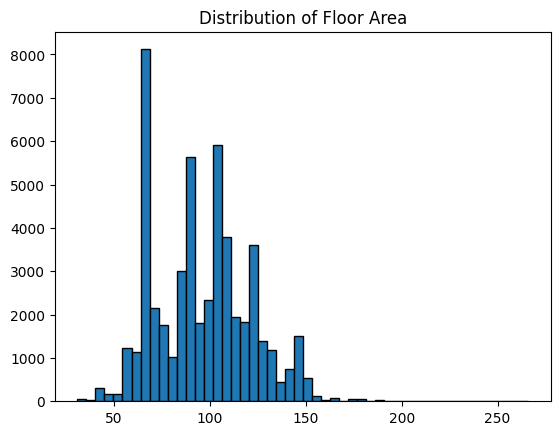

Terrace       2
Maisonette    1
Name: flat_model, dtype: int64

In [18]:
plt.hist(new_dataset['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of Floor Area')
plt.show()
display(new_dataset[new_dataset['floor_area_sqm'] > 200]['flat_model'].value_counts())

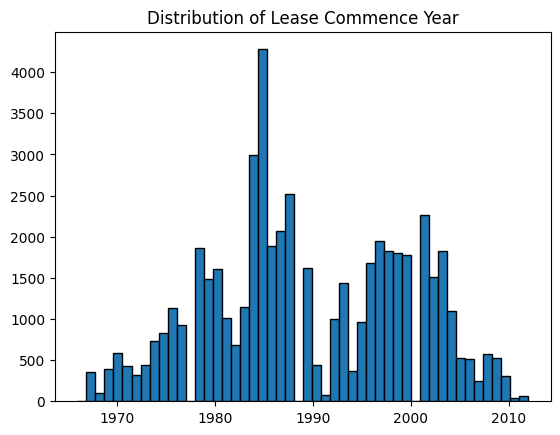

In [19]:
plt.hist(new_dataset['lease_commence_date'], bins=50, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

<ipython-input-20-47d5cdbdd387>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


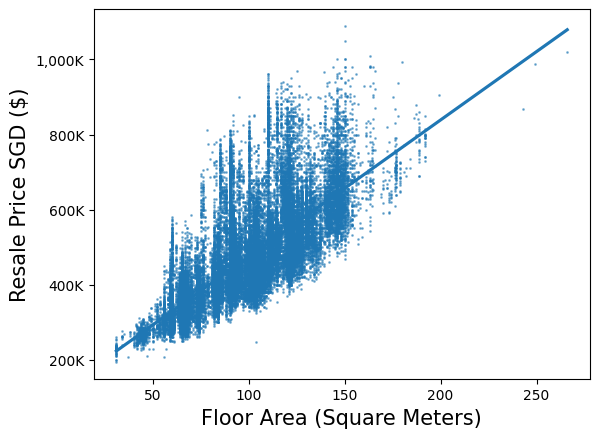

In [20]:
# Floor Area Prices
area = new_dataset[new_dataset['year'].isin([2012,2013,2014,2015,2016])]
p=sns.regplot(x='floor_area_sqm', y='resale_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

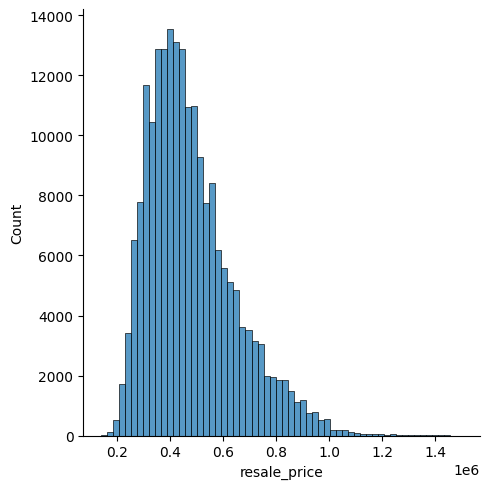

In [ ]:
sns.displot(new_dataset['resale_price'],bins=60)

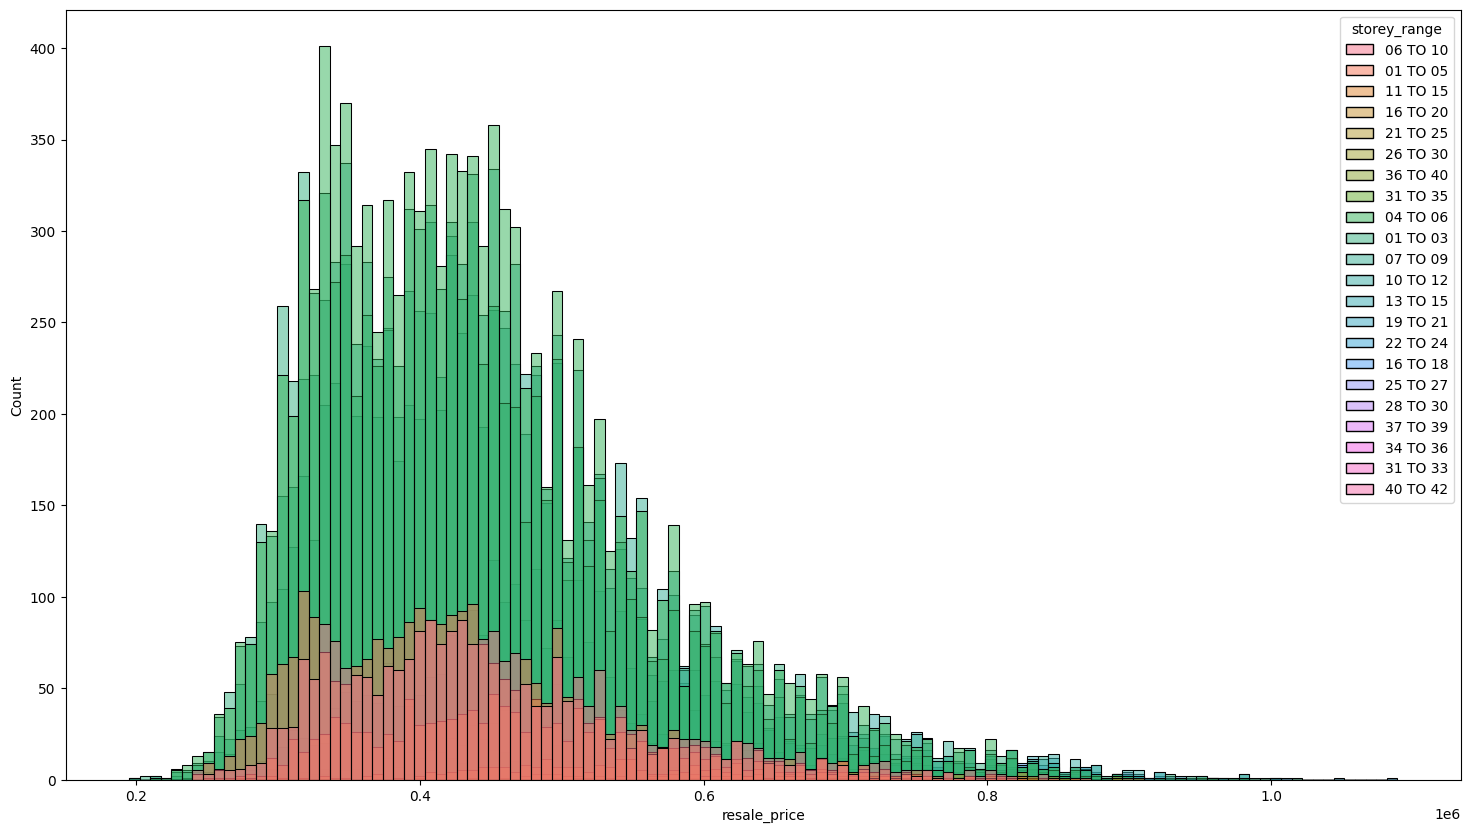

In [21]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset ,x='resale_price', bins=120,  hue='storey_range')
plt.show()

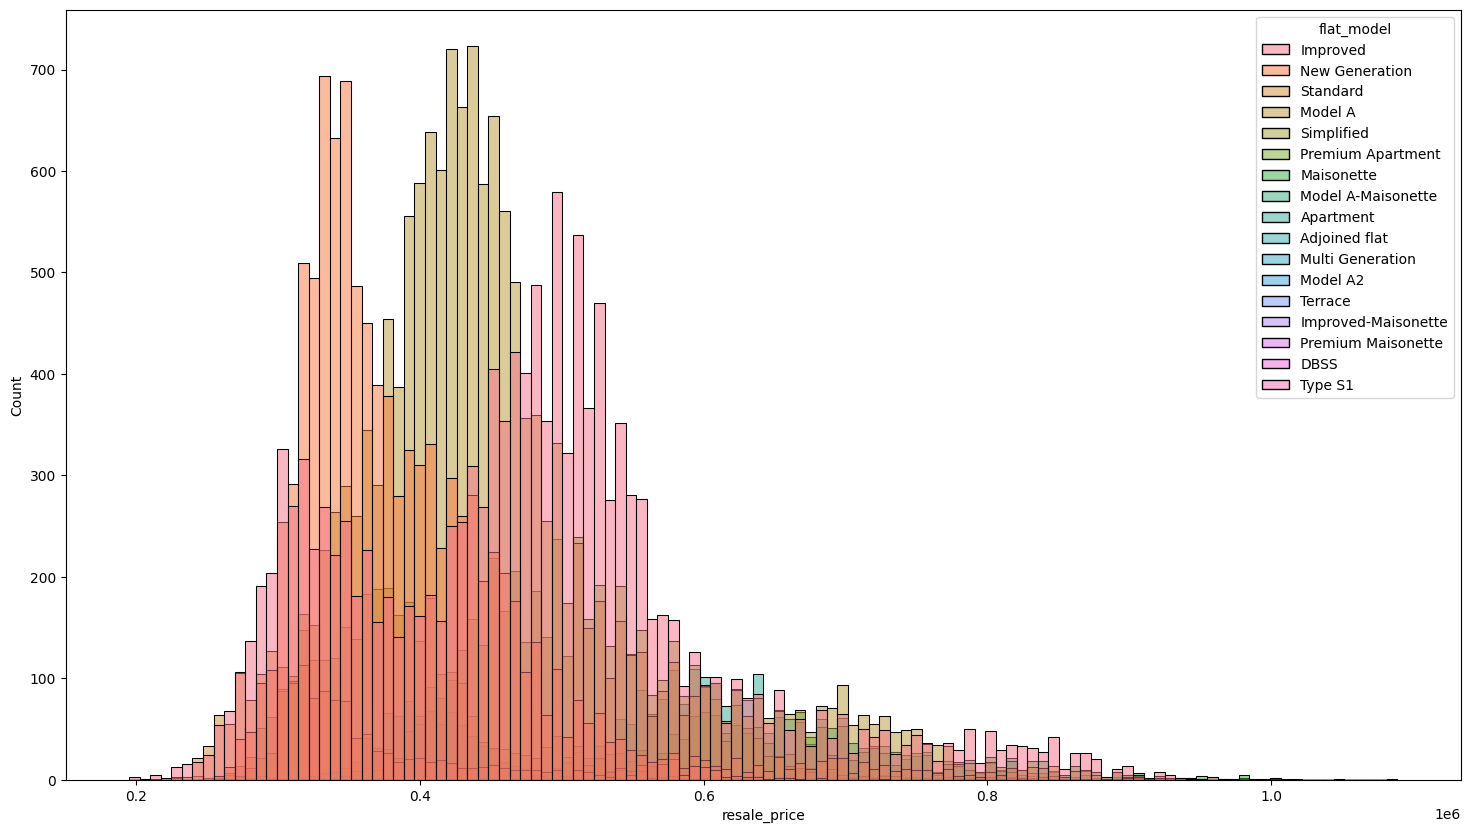

In [22]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset,x='resale_price',bins=120,hue='flat_model')
plt.show()

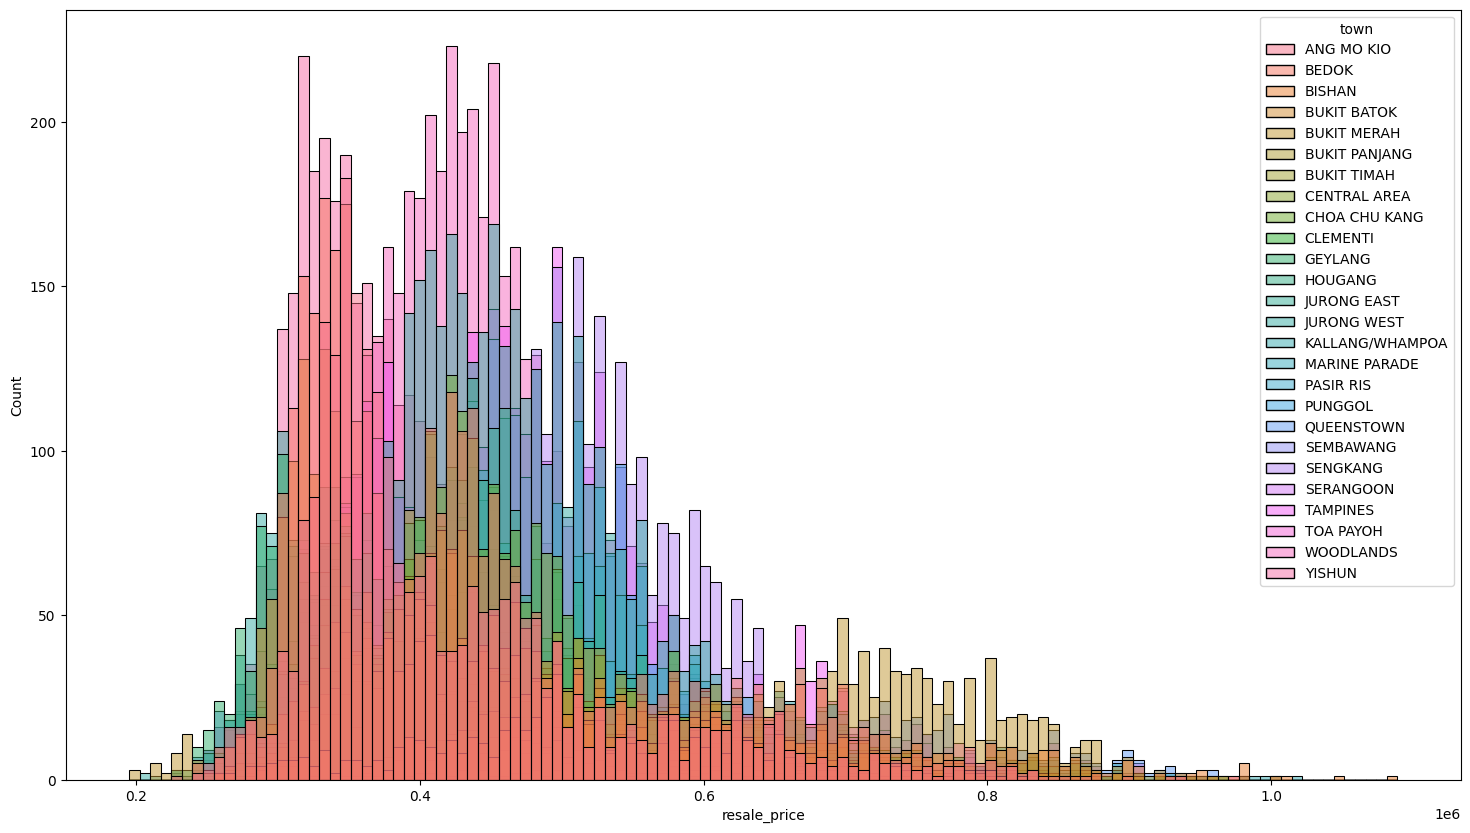

In [23]:
fig=plt.figure(figsize=(18,10))
sns.histplot(data=new_dataset,x='resale_price',bins=120,hue='town')
plt.show()

In [24]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-24-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


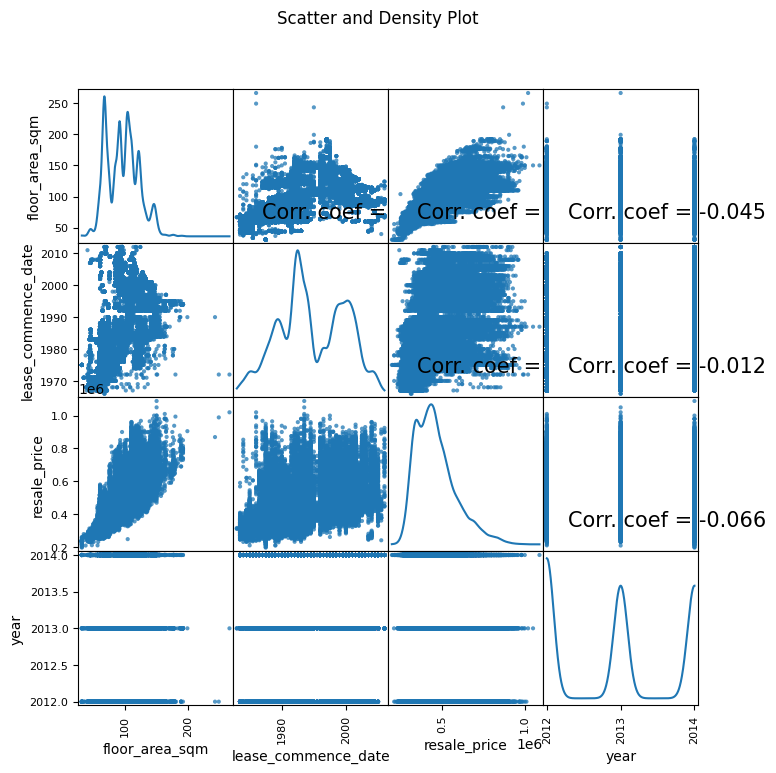

In [25]:
plotScatterMatrix(new_dataset, 8, 15)

In [26]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
No. of. categorical features:  7


In [27]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df_final

,floor_area_sqm,lease_commence_date,resale_price,year,month_2012-03,month_2012-04,month_2012-05,month_2012-06,month_2012-07,month_2012-08,...,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1
0,45.0,1986,250000.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.0,1980,265000.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68.0,1980,315000.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67.0,1984,320000.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,67.0,1980,321000.0,2012,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,122.0,1988,580000.0,2014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52199,146.0,1988,540000.0,2014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52200,164.0,1992,738000.0,2014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52201,152.0,1985,592000.0,2014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['resale_price'], axis=1)
Y = df_final['resale_price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
print(mean_squared_error(Y_valid, Y_pred))


539070.8298500048
3.3304093761535575e+26


In [31]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print("Mean absolute percentage", mean_absolute_percentage_error(Y_valid, Y_pred))
print("Mean squared error", mean_squared_error(Y_valid, Y_pred))

Mean absolute percentage 0.03780834384154272
Mean squared error 639743424.3401253


In [32]:
from sklearn import datasets, linear_model, metrics

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, Y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_valid, Y_valid)))




Coefficients:  [ 2.70816335e+03  3.98720021e+03  7.86408474e+14 ... -1.86775661e+14
 -1.86775661e+14  1.19290014e+13]
Variance score: -2.2389769044820976e+16
